<a href="https://colab.research.google.com/github/snehabn/thinkful_capstone1/blob/main/Capstone1_CVD_SNarasimhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of Cardiovascular Heart Disease Risk Factors**
By: Sneha Narasimhan

Thinkful Data Science Capstone 1

## Introduction

According to the World Health Organization, “...cardiovascular disease is the leading cause of death globally”[1]. Cardiovascular disease (CVD) is a disease of the heart and/or blood vessels. Some common acute CVD events that may occur due to lack of proper care and health maintenance are heart attacks and stroke [1]. 

The *Risk Factors for Cardiovascular Heart Disease* dataset from Kaggle that will be used for an empirical analysis can be found [here](https://www.kaggle.com/datasets/thedevastator/exploring-risk-factors-for-cardiovascular-diseas). This dataset provides general metrics on demographics, lifestyle choices, and additional co-morbidities as they relate to blood pressure readings and cholesterol levels. The analysis done here will show potential relationships between certain lifestyle choices and genetics to the occurrence of CVDs. Physicians and patients can use such data to work together to identify lifestyle changes and treatment plans to aid in the recovery or better management of the illness. 


---



## Data Setup

In [ ]:
# Set up environment

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Import dataset
url = 'https://raw.githubusercontent.com/snehabn/thinkful_capstone1/main/heart_data%202.csv'
cvd_raw = pd.read_csv(url)

# Preview the raw data
cvd_raw.info()
print()
cvd_raw.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB



,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


The data will need to be first cleaned and re-organized.  The data will be checked for null values and the content of the columns will be examined to ensure that the data is properly usable. 

In [ ]:
# Check for nulls in the dataframe
cvd_raw.isnull().values.any()

False

At this point, after a quick preview of the data, we need to make some assumptions:

1. `age` is in number of days.
2. `gender` (1) is female and (2) is male.
3. `height` is in centimeters.
4. `weight` is in kilograms.
5. `ap_hi` is systolic blood pressure, is measured in mmHg.
6. `ap_lo` is diastolic blood pressure, is measured in mmHg.

*Note: Blood pressure is measured in millimeters mercury or mmHg.*



In [ ]:
# Adjust age column for better readability 
cvd_raw.loc[:,'age'] /=365

cvd_raw.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# Renaming blood pressure columns
cvd_adjusted = cvd_raw.rename(columns={'ap_hi':'systolic_bp', 'ap_lo':'diastolic_bp'})

# Check basic statistics of the columns to identify outliers that may need adjustment or removal
cvd_adjusted.describe()

,index,id,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,28851.302323,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,25006.750000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,50001.500000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,74889.250000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Here we can see that both of the blood pressure columns have outliers that need to be adjusted for sensibility.

In [ ]:
# Overview of unique values of 'systolic_bp' and 'diastolic_bp' column
print("systolic_bp")
print(cvd_adjusted['systolic_bp'].unique())
print()
print("diastolic_bp")
print(cvd_adjusted['diastolic_bp'].unique())

systolic_bp
[  110   140   130   150   100   120   145   170   135   125    90   180
   160   133   190    80   122   169   126   158   200    14   123    70
   161   147   115   137   153    11   148   105   220   119   141   165
   164    12   124   172   902   162   906   117   134   166   210   176
   116    10   121    16   112   159   113   118   155   142   131   157
   136   146   138  -100   909   109    85   106   129    93     7    95
   179   156   168   132   104   103   178   175   128   151    15   139
 11500   127    17   108   144   102     1  1420    13   143   701   107
   184   149   167   114   101    60  1500   181   171   202  -115   111
   907    20   188   185   163   173   154   177  -140   174  -120 14020
  1400   240   191   197  1620   152    96   199  -150  1130   193    99
   196   309   401 16020  1202   806  1300   230   207   215    97  1409
 11020    24   960 13010  1110   195  1205   187  2000]

diastolic_bp
[   80    90    70   100    60    85    89

Two things can be noted here. First, there are negative values that we can assume were erroneously entered. By adjusting these to positive values, we can retain the data point. Second, there are also values that are well beyond the natural possible values for blood pressure readings. These outlier entries need to be removed for the analysis process.

According to the National Institutes of Health (NIH), the highest blood pressure reading ever recorded for a human was a systolic blood pressure of 370mmHg and diastolic blood pressure of 360mmHg, read as 370/360 [2]. We can assume these to be the natural upper limits.

According to Blood Pressure UK's charts, the lowest blood pressure reading is 70/40 [3]. We can assume these to be the natural lower limits.

In [ ]:
# Set upper limit for systolic_bp
cvd_systolic_adj = (cvd_adjusted[cvd_adjusted['systolic_bp'] <= 370])

# Find absolute value of negative systolic_bp measurements
cvd_systolic_adj['systolic_bp'] = cvd_systolic_adj['systolic_bp'].abs()

# Set lower limit for systolic_bp
cvd_systolic_adj = (cvd_systolic_adj[cvd_systolic_adj['systolic_bp'] > 70])

cvd_systolic_adj.describe()
#cvd_systolic_adj['systolic_bp'].unique()

<ipython-input-6-d2abde81ac65>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cvd_systolic_adj['systolic_bp'] = cvd_systolic_adj['systolic_bp'].abs()


,index,id,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,gluc,smoke,alco,active,cardio
count,69761.00000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000
mean,35001.49337,49975.269922,53.341719,1.349622,164.360115,74.212831,127.019466,96.626869,1.367225,1.226516,0.088258,0.053755,0.803845,0.499720
std,20206.01059,28849.300245,6.758840,0.476854,8.199467,14.400186,17.086394,188.551416,0.680605,0.572304,0.283672,0.225535,0.397090,0.500004
min,0.00000,0.000000,29.583562,1.000000,55.000000,10.000000,80.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17501.00000,25008.000000,48.400000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,35001.00000,50004.000000,53.983562,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.00000,74889.000000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.00000,99999.000000,64.967123,2.000000,250.000000,200.000000,309.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Set upper limit for diastolic_bp
cvd_adj = (cvd_systolic_adj[cvd_systolic_adj['diastolic_bp'] <= 360])

# Find absolute value of negative diastolic_bp measurements
cvd_adj['diastolic_bp'] = cvd_adj['diastolic_bp'].abs()

# Set lower limit for diastolic_bp
cvd_adj = (cvd_adj[cvd_adj['diastolic_bp'] > 40])

cvd_adj.describe()
#cvd_adj['diastolic_bp'].unique()

<ipython-input-7-774d953b075d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cvd_adj['diastolic_bp'] = cvd_adj['diastolic_bp'].abs()


,index,id,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,gluc,smoke,alco,active,cardio
count,68752.000000,68752.000000,68752.000000,68752.000000,68752.000000,68752.000000,68752.000000,68752.000000,68752.000000,68752.000000,68752.000000,68752.000000,68752.000000,68752.000000
mean,35002.297780,49976.411843,53.327703,1.348775,164.362884,74.124062,126.627749,81.387160,1.364746,1.225928,0.087997,0.053598,0.803424,0.494967
std,20203.539434,28845.765640,6.761952,0.476586,8.184653,14.330912,16.740355,9.648456,0.678992,0.571891,0.283293,0.225225,0.397412,0.499978
min,0.000000,0.000000,29.583562,1.000000,55.000000,11.000000,80.000000,45.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17497.750000,25002.750000,48.378082,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,35011.500000,50018.000000,53.975342,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52488.250000,74870.750000,58.421918,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,64.967123,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Drop unnecessary columns
columns_to_drop = ['index', 'id']
cvd_adj = cvd_adj.drop(columns=columns_to_drop)

In [ ]:
cvd_adj.head()

,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


## Analysis:

We can look at the correlation matrix with all variables in the dataframe to determine where there is a strong positive correlation.

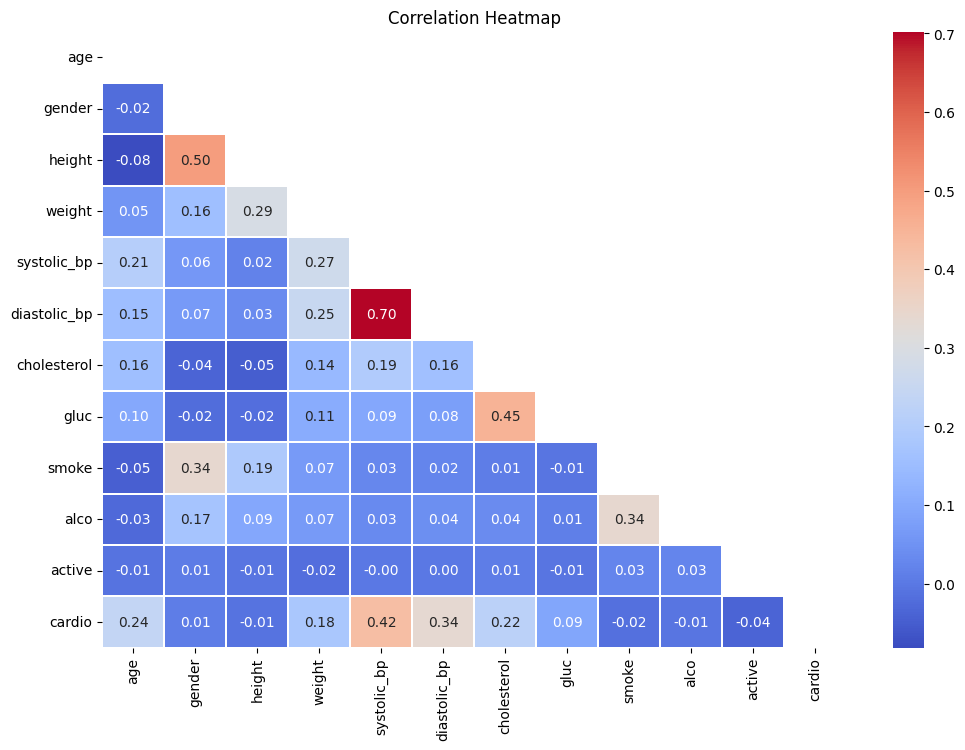

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = cvd_adj.corr()

# Changing the matrix shape to remove redundant data
matrix = np.triu(cvd_adj.corr())

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.05, mask=matrix)
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


*Figure 1: Correlation heatmap of variables in CVD*

This correlation heatmap show that the strongest correlation is between the systolic and diastolic blood pressure . Physiologically, this is expected and makes sense. When there is a higher pressure in the heart, there will be higher pressure in the surrounding blood vessels.

Since we are looking at immediate heart disease, we can focus on the systolic blood pressure as it is the maximum pressure the heart exerts [4]. The general hypothesis made for this analysis that lifestyle habits and to some extent genetics can affect the potential for cardiovascular diseases of the heart.

We can focus on some common lifestyle habits such as smoking and physical activity as it relates to CVD. Additionally we can also examine the relationship weight has on CVD, as it could be a result of lifestyle habits and/or genetics.

### 1. Do smokers have a higher systolic blood pressure than non-smokers?

Based on the correlation chart above, we can see that there seems to be a mild positive correlation (0.03) between these two groups. Let's determine statistical significance.

In [ ]:
# Split up the dataset
smokers = cvd_adj[(cvd_adj['smoke'] == 1)]
smokers.info()
print()
nonsmokers = cvd_adj[(cvd_adj['smoke'] == 0)]
nonsmokers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6050 entries, 14 to 69995
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           6050 non-null   float64
 1   gender        6050 non-null   int64  
 2   height        6050 non-null   int64  
 3   weight        6050 non-null   float64
 4   systolic_bp   6050 non-null   int64  
 5   diastolic_bp  6050 non-null   int64  
 6   cholesterol   6050 non-null   int64  
 7   gluc          6050 non-null   int64  
 8   smoke         6050 non-null   int64  
 9   alco          6050 non-null   int64  
 10  active        6050 non-null   int64  
 11  cardio        6050 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 614.5 KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62702 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           62702 non-null  float

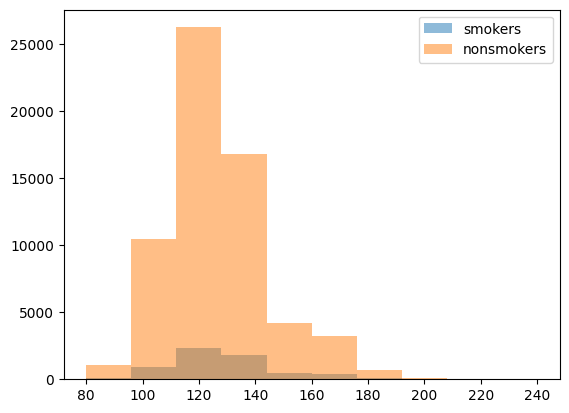

In [ ]:
plt.hist(smokers['systolic_bp'], alpha = .5, label = "smokers")
plt.hist(nonsmokers['systolic_bp'], alpha = .5, label = "nonsmokers")
plt.legend(loc="upper right")
plt.show()

*Figure 2: Sample distribution of smokers and nonsmokers.*

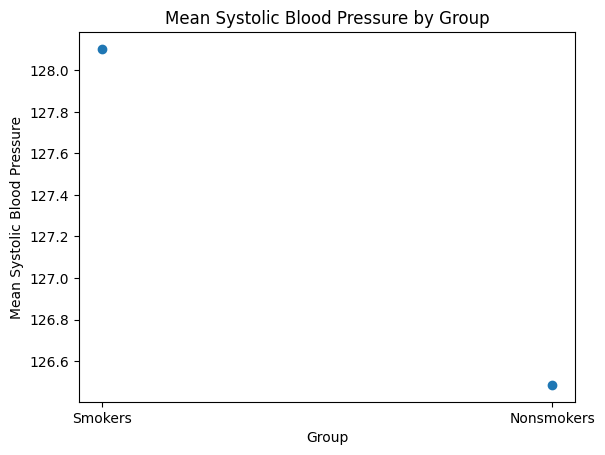

In [ ]:
import matplotlib.pyplot as plt

# Calculate mean systolic blood pressure for each group
smokers_mean = smokers['systolic_bp'].mean()
nonsmokers_mean = nonsmokers['systolic_bp'].mean()

# Create scatter plot
plt.scatter(['Smokers', 'Nonsmokers'], [smokers_mean, nonsmokers_mean])
plt.title("Mean Systolic Blood Pressure by Group")
plt.xlabel("Group")
plt.ylabel("Mean Systolic Blood Pressure")

# Show the plot
plt.show()

*Figure 3: Preview of difference in mean systolic blood pressure between smokers and non-smokers.*

In [ ]:
# Check for normality using skewness and kurtosis
print(stats.describe(smokers['systolic_bp']))
print(stats.describe(nonsmokers['systolic_bp']))

## Both values are within visual range for normality.

DescribeResult(nobs=6050, minmax=(80, 240), mean=128.10297520661157, variance=306.27225102434795, skewness=0.9206834810443177, kurtosis=1.8543261122547223)
DescribeResult(nobs=62702, minmax=(80, 240), mean=126.48540716404581, variance=277.5022431469211, skewness=0.9169966352678034, kurtosis=1.8324629761512714)


Visually there seem to be a normal distribution. We will next perform a Shapiro-Wilk test to formally test for normality

In [ ]:
from scipy.stats import shapiro
# Shapiro-Wilk test for smokers
stat_smokers, p_smokers = shapiro(smokers['systolic_bp'])
print('Smokers W:', stat_smokers)
print('Smokers p-value:', p_smokers)

# Shapiro-Wilk test for nonsmokers
stat_nonsmokers, p_nonsmokers = shapiro(nonsmokers['systolic_bp'])
print('Nonsmokers W:', stat_nonsmokers)
print('Nonsmokers p-value:', p_nonsmokers)

Smokers W: 0.9187635779380798
Smokers p-value: 0.0
Nonsmokers W: 0.9085284471511841
Nonsmokers p-value: 0.0


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Based on the results of the Shapiro-Wilk test, we can see that these distributions do not have a normal distribution. Although the W statistic is close to 1, the p-values are at 0.0.

We can now use a non-parametric test to determine significance. The Mann-Whitney U test can be used here as we are looking to compare two independent samples.

Here the null hypothesis (H₀) will be no significant difference between the systolic blood pressure distributions for smokers and non-smokers.

The alternative hypothesis (Hₐ) is that there is a significant difference between the systolic blood pressure distributions of smokers and non-smokers.

In [ ]:
# Transform the data to treat outliers
import numpy as np

# Log transformation for smokers and nonsmokers systolic blood pressure
smokers['systolic_bp_log'] = np.log(smokers['systolic_bp'])
nonsmokers['systolic_bp_log'] = np.log(nonsmokers['systolic_bp'])



<ipython-input-16-03e62c492358>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smokers['systolic_bp_log'] = np.log(smokers['systolic_bp'])
<ipython-input-16-03e62c492358>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonsmokers['systolic_bp_log'] = np.log(nonsmokers['systolic_bp'])


In [ ]:
# Check df header to see if log values persist
nonsmokers.columns

Index(['age', 'gender', 'height', 'weight', 'systolic_bp', 'diastolic_bp',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',
       'systolic_bp_log'],
      dtype='object')

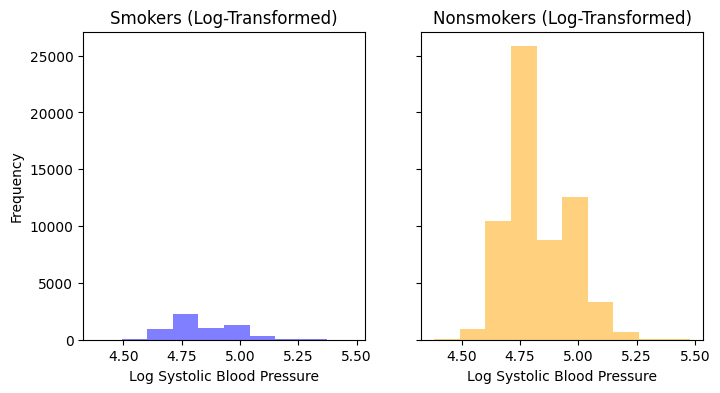

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharey=True)

# Smokers' log-transformed systolic blood pressure distribution
ax1.hist(smokers['systolic_bp_log'], alpha=0.5, label="Smokers", color='blue')
ax1.set_title("Smokers (Log-Transformed)")
ax1.set_xlabel("Log Systolic Blood Pressure")
ax1.set_ylabel("Frequency")

# Nonsmokers' log-transformed systolic blood pressure distribution
ax2.hist(nonsmokers['systolic_bp_log'], alpha=0.5, label="Nonsmokers", color='orange')
ax2.set_title("Nonsmokers (Log-Transformed)")
ax2.set_xlabel("Log Systolic Blood Pressure")

# Show the plot
plt.show()

*Figure 4: Log transformed data of systolic blood pressure of smokers and nonsmokers.*

In [ ]:
# Perform nonparametric test for significance.
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
U1, p = mannwhitneyu(smokers['systolic_bp'], nonsmokers['systolic_bp'])

print("Mann-Whitney U-statistic:", U1)
print("p-value:", p)

Mann-Whitney U-statistic: 200152064.5
p-value: 1.5974546979829296e-13


The p-value returned by the Mann-Whitney U test is smaller than alpha of 0.05. This indicates that we can reject the H₀. **There is a significant difference between the distributions of systolic blood pressures of smokers and nonsmokers.**

In [ ]:
# Get 95% confidence interval
import math
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(smokers['systolic_bp'], nonsmokers['systolic_bp'])


'The difference in means at the 95% confidence interval (two-tail) is between -2.0774345206175706 and -1.1577015645139588.'

**Here we can say with 95% confidence that patients who are nonsmokers have on average, a systolic blood pressure 1.158 to 2.077 mmHg lower than patients who are smokers.**

[Text(0.5, 1.0, 'Average systolic blood pressure in smokers v. non-smokers')]

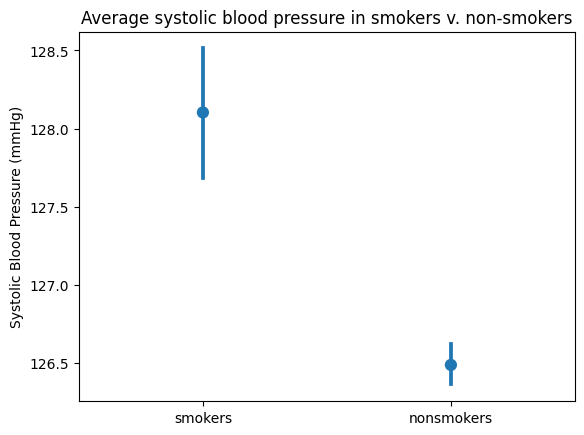

In [ ]:
import seaborn as sns

g = sns.pointplot(data=[smokers['systolic_bp'],
                        nonsmokers['systolic_bp']], join=False)
                        
g.set(xticklabels = ['smokers', 'nonsmokers'])
g.set(ylabel = 'Systolic Blood Pressure (mmHg)')
g.set(title= 'Average systolic blood pressure in smokers v. non-smokers')

*Figure 5: Difference in smokers and non-smokers average systolic blood pressure.* 

### 2. Do those who are regularly active have a higher blood pressure?

The correlation chart from Figure 1 indicates that there may be a slightly negative or no correlation at all (-0.00) between regular activity and high systolic blood pressure. Let's check to see if this is indeed true.

In [ ]:
# Split up the dataset
active = cvd_adj[(cvd_adj['active'] == 1)]
active.info()
print()
not_active = cvd_adj[(cvd_adj['active'] == 0)]
not_active.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55237 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           55237 non-null  float64
 1   gender        55237 non-null  int64  
 2   height        55237 non-null  int64  
 3   weight        55237 non-null  float64
 4   systolic_bp   55237 non-null  int64  
 5   diastolic_bp  55237 non-null  int64  
 6   cholesterol   55237 non-null  int64  
 7   gluc          55237 non-null  int64  
 8   smoke         55237 non-null  int64  
 9   alco          55237 non-null  int64  
 10  active        55237 non-null  int64  
 11  cardio        55237 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 5.5 MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13515 entries, 2 to 69998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           13515 non-null  float64

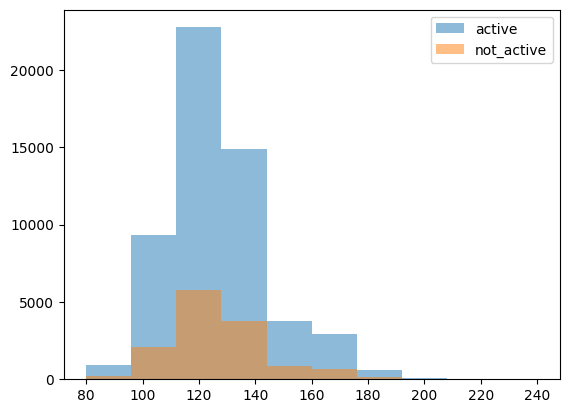

In [ ]:
plt.hist(active['systolic_bp'], alpha = .5, label = "active")
plt.hist(not_active['systolic_bp'], alpha = .5, label = "not_active")
plt.legend(loc="upper right")
plt.show()

*Figure 5: Sample distribution of active and not-active patients.*

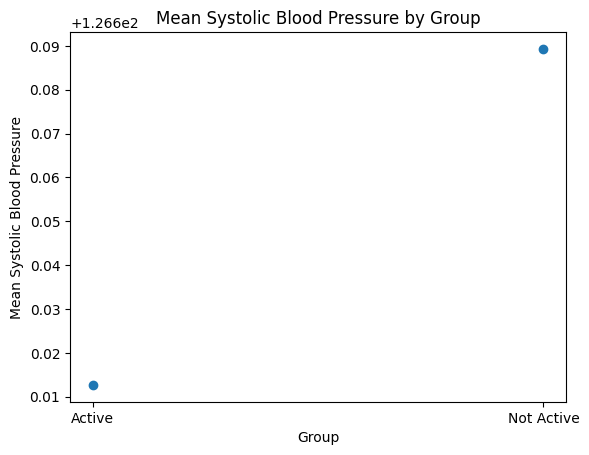

In [ ]:
import matplotlib.pyplot as plt

# Calculate mean systolic blood pressure for each group
active_mean = active['systolic_bp'].mean()
not_active_mean = not_active['systolic_bp'].mean()

# Create scatter plot
plt.scatter(['Active', 'Not Active'], [active_mean, not_active_mean])
plt.title("Mean Systolic Blood Pressure by Group")
plt.xlabel("Group")
plt.ylabel("Mean Systolic Blood Pressure")

# Show the plot
plt.show()

*FIgure 6: Preview of difference in mean systolic blood pressure between active patients and not-active patients.*

In [ ]:
# Check for normality using skewness and kurtosis
print(stats.describe(active['systolic_bp']))
print(stats.describe(not_active['systolic_bp']))

DescribeResult(nobs=55237, minmax=(80, 240), mean=126.61268714810724, variance=280.8297456160223, skewness=0.907522857274614, kurtosis=1.779715397349059)
DescribeResult(nobs=13515, minmax=(80, 240), mean=126.68930817610062, variance=277.8430076240526, skewness=0.9671269799863691, kurtosis=2.096207286108199)


Based on visual examination and the skewness and kurtosis measures, these two groups appear to be normally distributed. Let's perform the Shapiro-Wilk test to formally determine if these groups have a normal distribution.

In [ ]:
from scipy.stats import shapiro
# Shapiro-Wilk test for active
stat_active, p_active = shapiro(active['systolic_bp'])
print('Active W:', stat_active)
print('Active p-value:', p_active)

# Shapiro-Wilk test for not active
stat_not_active, p_not_active = shapiro(not_active['systolic_bp'])
print('Not active W:', stat_not_active)
print('Not active p-value:', p_not_active)

Active W: 0.9114229679107666
Active p-value: 0.0
Not active W: 0.9030429124832153
Not active p-value: 0.0


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The Shapiro-Wilk test determines that although these distributions appear to be normal, they are in fact not normal. The W statistics for both groups are close to 1, but the p-values result in 0. This indicates that similar to the previous question, we will have to employ a non-parametric test to determine significance.

The Mann-Whitney U test will be used here again, as we are looking to compare two independent samples.

Here the null hypothesis (H₀) will be no significant difference between the systolic blood pressure distributions for patients who are active and those who are not.

The alternative hypothesis (Hₐ) is that there is a significant difference between the systolic blood pressure distributions of patients who are active and those who are not.

In [ ]:
# Transform the data to treat outliers
import numpy as np

# Log transformation for active and not_active systolic blood pressure
active['systolic_bp_log'] = np.log(active['systolic_bp'])
not_active['systolic_bp_log'] = np.log(not_active['systolic_bp'])

<ipython-input-27-42383bf481de>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active['systolic_bp_log'] = np.log(active['systolic_bp'])
<ipython-input-27-42383bf481de>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_active['systolic_bp_log'] = np.log(not_active['systolic_bp'])


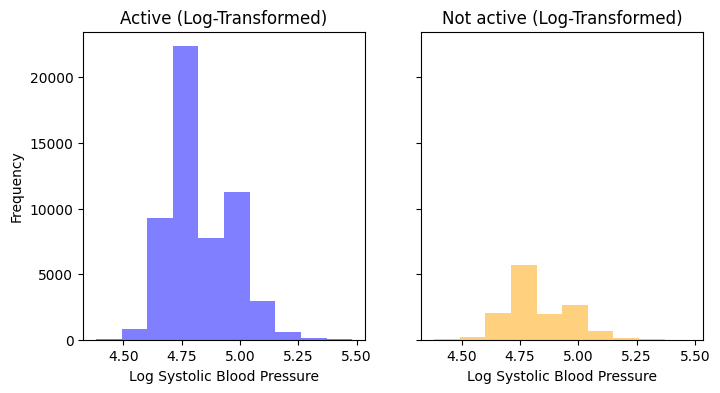

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharey=True)

# Active patients' log-transformed systolic blood pressure distribution
ax1.hist(active['systolic_bp_log'], alpha=0.5, label="Active", color='blue')
ax1.set_title("Active (Log-Transformed)")
ax1.set_xlabel("Log Systolic Blood Pressure")
ax1.set_ylabel("Frequency")

# Not active patients' log-transformed systolic blood pressure distribution
ax2.hist(not_active['systolic_bp_log'], alpha=0.5, label="Not active", color='orange')
ax2.set_title("Not active (Log-Transformed)")
ax2.set_xlabel("Log Systolic Blood Pressure")

# Show the plot
plt.show()

*Figure 7: Log transformed data of systolic blood pressure of active and not active patients.*

In [ ]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
U1, p = mannwhitneyu(active['systolic_bp'], not_active['systolic_bp'])

print("Mann-Whitney U-statistic:", U1)
print("p-value:", p)

Mann-Whitney U-statistic: 371142940.5
p-value: 0.2869991035209988


The p-value from the resulting Mann-Whitney U test is greater than the alpha of 0.05. This proves the H₀ to be true. **There is no significant difference in average heart health between the active and not active groups of patients.**

[Text(0.5, 1.0, 'Average systolic blood pressure in active v. not-active patients')]

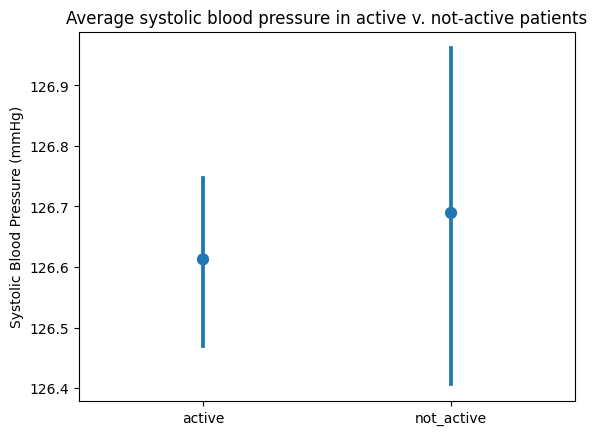

In [ ]:
import seaborn as sns

g = sns.pointplot(data=[active['systolic_bp'],
                        not_active['systolic_bp']], join=False)
                        
g.set(xticklabels = ['active', 'not_active'])
g.set(ylabel = 'Systolic Blood Pressure (mmHg)')
g.set(title= 'Average systolic blood pressure in active v. not-active patients')

*Figure 8: Minimal difference in average systolic blood pressure in active and not-active patients.*

### 3. Do those who have a cardiovascular disease weigh more?
The correlation chart from Figure 1 indicates a moderately positive realtionship (0.18) between weight and presence of CVD. Let's explore further to determine statistical significance.

In [ ]:
# Split up the dataset
cvd_positive = cvd_adj[(cvd_adj['cardio'] == 1)]
cvd_positive.info()
print()
cvd_negative = cvd_adj[(cvd_adj['cardio'] == 0)]
cvd_negative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34030 entries, 1 to 69998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           34030 non-null  float64
 1   gender        34030 non-null  int64  
 2   height        34030 non-null  int64  
 3   weight        34030 non-null  float64
 4   systolic_bp   34030 non-null  int64  
 5   diastolic_bp  34030 non-null  int64  
 6   cholesterol   34030 non-null  int64  
 7   gluc          34030 non-null  int64  
 8   smoke         34030 non-null  int64  
 9   alco          34030 non-null  int64  
 10  active        34030 non-null  int64  
 11  cardio        34030 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 3.4 MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34722 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           34722 non-null  float64

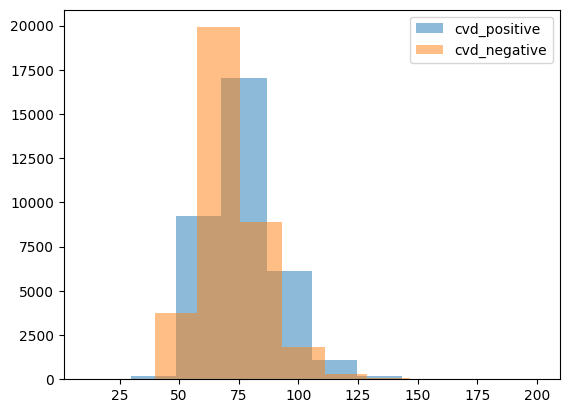

In [ ]:
plt.hist(cvd_positive['weight'], alpha = .5, label = "cvd_positive")
plt.hist(cvd_negative['weight'], alpha = .5, label = "cvd_negative")
plt.legend(loc="upper right")
plt.show()

*Figure 8: Sample distribution of CVD positive and negative patients.*

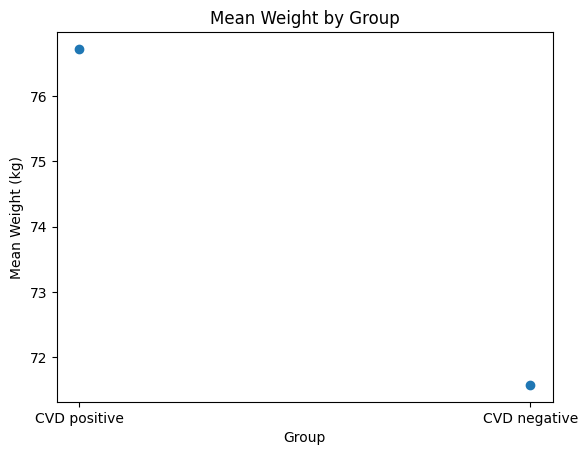

In [ ]:
import matplotlib.pyplot as plt

# Calculate mean systolic blood pressure for each group
cvd_positive_mean = cvd_positive['weight'].mean()
cvd_negative_mean = cvd_negative['weight'].mean()

# Create scatter plot
plt.scatter(['CVD positive', 'CVD negative'], [cvd_positive_mean, cvd_negative_mean])
plt.title("Mean Weight by Group")
plt.xlabel("Group")
plt.ylabel("Mean Weight (kg)")

# Show the plot
plt.show()

*Figure 9: Preview of difference in mean weight between CVD positive and negative patients.*

In [ ]:
# Check for normality using skewness and kurtosis
print(stats.describe(cvd_positive['weight']))
print(stats.describe(cvd_negative['weight']))

DescribeResult(nobs=34030, minmax=(11.0, 200.0), mean=76.72276814575376, variance=221.31666099622882, skewness=0.9875633188196379, kurtosis=2.329789605998295)
DescribeResult(nobs=34722, minmax=(22.0, 200.0), mean=71.57714705374114, variance=176.65120362855748, skewness=0.9981769019461655, kurtosis=2.882992052899043)


Based on visual examination and the skewness and kurtosis measures, these two groups appear to be normally distributed. Let's perform the Shapiro-Wilk test to formally determine if these groups have a normal distribution.

In [ ]:
from scipy.stats import shapiro
# Shapiro-Wilk test for cvd_positive
stat_cvd_positive, p_cvd_positive = shapiro(cvd_positive['weight'])
print('cvd_positive W:', stat_cvd_positive)
print('cvd_positive p-value:', p_cvd_positive)

# Shapiro-Wilk test for cvd_negative
stat_cvd_negative, p_cvd_negative = shapiro(cvd_negative['weight'])
print('cvd_negative W:', stat_cvd_negative)
print('cvd_negative p-value:', p_cvd_negative)

cvd_positive W: 0.9549999833106995
cvd_positive p-value: 0.0
cvd_negative W: 0.9559644460678101
cvd_negative p-value: 0.0


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The Shapiro-Wilk test indicates that there is no normal distribution in these groups. The Mann-Whitney U test will be used here again, as we are looking to compare two independent samples.

Here the null hypothesis (H₀) will be no significant difference between the average weight of patients with CVD and without CVD.

The alternative hypothesis (Hₐ) is that there is a significant difference between the average weight of patients with CVD and without CVD.

In [ ]:
# Transform the data to treat outliers
import numpy as np

# Log transformation for CVD positive and CVD negative patients' weight
cvd_positive['weight_log'] = np.log(cvd_positive['weight'])
cvd_negative['weight_log'] = np.log(cvd_negative['weight'])

<ipython-input-36-2df0efb1dcf5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cvd_positive['weight_log'] = np.log(cvd_positive['weight'])
<ipython-input-36-2df0efb1dcf5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cvd_negative['weight_log'] = np.log(cvd_negative['weight'])


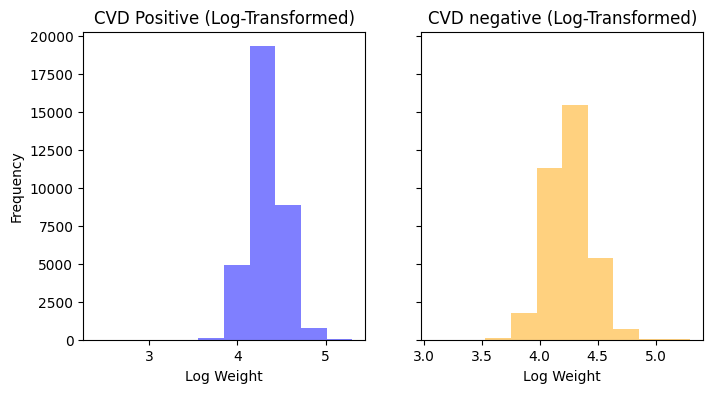

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharey=True)

# CVD positive patients' log-transformed weight distribution
ax1.hist(cvd_positive['weight_log'], alpha=0.5, label="CVD positive", color='blue')
ax1.set_title("CVD Positive (Log-Transformed)")
ax1.set_xlabel("Log Weight")
ax1.set_ylabel("Frequency")

# CVD negative patients' log-transformed weight distribution
ax2.hist(cvd_negative['weight_log'], alpha=0.5, label="CVD negative", color='orange')
ax2.set_title("CVD negative (Log-Transformed)")
ax2.set_xlabel("Log Weight")

# Show the plot
plt.show()

*Figure 10: Log transformed data of weight of CVD positive and CVD negative patients.*

In [ ]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
U1, p = mannwhitneyu(cvd_positive['weight'], cvd_negative['weight'])

print("Mann-Whitney U-statistic:", U1)
print("p-value:", p)

Mann-Whitney U-statistic: 713824314.0
p-value: 0.0


The p-value resulting from this nonparametric test is `0` (less than the alpha of 0.05), suggesting that H₀ is disproved. **There is a statistically significant difference between the weights of CVD positive patients and CVD negative patients.**

In [ ]:
import math
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(cvd_positive['weight'], cvd_negative['weight'])

'The difference in means at the 95% confidence interval (two-tail) is between -5.3566391225851255 and -4.934603061440111.'

**Here we can say with 95% confidence that CVD negative patients weigh 4.93 kg to 5.36 kg less than CVD positive patients.**


[Text(0.5, 1.0, 'Average weight of CVD positive and CVD negative patients')]

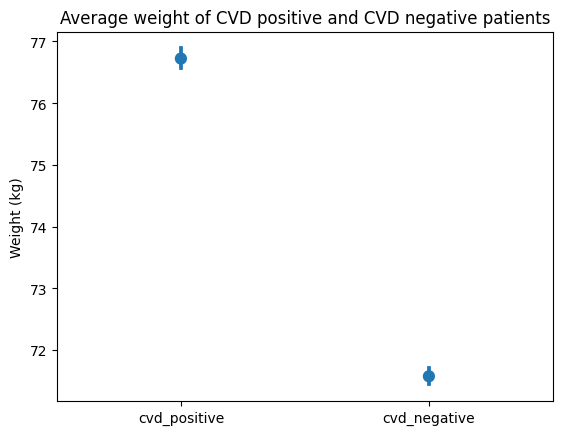

In [ ]:
import seaborn as sns

g = sns.pointplot(data=[cvd_positive['weight'],
                        cvd_negative['weight']], join=False)
                        
g.set(xticklabels = ['cvd_positive', 'cvd_negative'])
g.set(ylabel = 'Weight (kg)')
g.set(title= 'Average weight of CVD positive and CVD negative patients')

*Figure 11: Difference in weight in CVD positive and negative patients.*

## Conclusions



Based on the findings of this analysis, it appears that some lifestyle changes do have an impact on the presence of CVDs. **We can see that smoking and weight do directly have a statistically significant impact on a patient's potential of developing CVD.**

One important piece of information that is missing is the race or ethnicities of the patients. Lifestyles, food habits, and even environment in different regions of the world could have substantial impact on habits and overall health. This lack of data could cause misclassification and information bias in the results. 

Other additional variables that would aid in recommendations with increased clarity would include, diet, family history, and an increased range in the age of study participants. Genetics and diet play a great deal in CVD prevention and/or development. 

According to the American Heart Association (AHA) and the Journal of Cardiovascular Development and Disease, "...the incidence of CVD in US men and women is ~40% from 40–59 years, ~75% from 60–79 years, and ~86% in those above the age of 80..."[5] The range of age of the study participants need to be widened to include younger and especially older patients. 

By bringing in these additional data points, we can arrive at a fuller understanding of causes of CVD and further promote relevant remedies.


## Citations

[1] World Health Organization. (2023). Cardiovascular diseases (CVDs). World Health Organization. Retrieved March 31, 2023, from https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)

[2] Narloch, J. A., & Brandstater, M. E. (1995). Influence of breathing technique on arterial blood pressure during heavy weight lifting. Archives of physical medicine and rehabilitation, 76(5), 457–462. https://doi.org/10.1016/s0003-9993(95)80578-8

[3] What do the numbers mean? Blood Pressure UK - Helping you to lower your blood pressure. (2021). Retrieved April 2, 2023, from https://www.bloodpressureuk.org/your-blood-pressure/understanding-your-blood-pressure/what-do-the-numbers-mean/ 

[4] Mayo Foundation for Medical Education and Research. (2022, March 1). Pulse pressure: An indicator of heart health? Mayo Clinic. Retrieved April 2, 2023, from https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/expert-answers/pulse-pressure/faq-20058189 

[5] Rodgers, J. L., Jones, J., Bolleddu, S. I., Vanthenapalli, S., Rodgers, L. E., Shah, K., Karia, K., &amp; Panguluri, S. K. (2019, April 27). Cardiovascular risks associated with gender and aging. Journal of cardiovascular development and disease. Retrieved April 5, 2023, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6616540/ 